<a href="https://colab.research.google.com/github/nkrjain5/Face_mask_detection/blob/master/face_mask_detect_test_002_new_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, Activation,MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.utils import plot_model
from matplotlib import pyplot

import numpy as np


In [ ]:
KERNEL_SIZE=(3,3)
RELU="relu"
SOFTMAX="softmax"
PADDING="same"
SIGMOID='sigmoid'
RMSPROP='rmsprop'
LOSS_BIN='binary_crossentropy'
LOSS_CAT='categorical_crossentropy'
LEARNING_RATE=0.001

EPOCH=100

input_shape=(224,224,3	)
num_classes=1
num_pixels=0
BATCH_SIZE=32

VERBOSE_ON=1
VERBOSE_OFF=0
VERBOSE_ONE_LINE_EPOCH=2
input_data_size=(224,224)

train_data_dir=r'/media/ankur/CDAC3/Udemy/DL/face_mask_detection_pyimagesearch/Face_mask_detector_nkr/dataset/Train/'
drive_train_data_path=r'/content/drive/My Drive/DL/Face_mask_detection/dataset/Train/'




model_name='face_mask_model_009_newDS_50Epochs'
model_drive_save_path=r'/content/drive/My Drive/DL/Face_mask_detection/Trained_mode/'+model_name+'.h5'
plots_drive_save_path=r'/content/drive/My Drive/DL/Face_mask_detection/Trained_mode/'+model_name+'.jpeg'
model_summary_save_path=r'/content/drive/My Drive/DL/Face_mask_detection/Trained_mode/'+model_name+'.png'


In [ ]:
def generate_model(summary=1,save=1):
  model=Sequential()

  model.add(Conv2D(64,KERNEL_SIZE,input_shape=input_shape))
  model.add(Activation(RELU))
  # model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,KERNEL_SIZE))
  model.add(Activation(RELU))
  # model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(64,KERNEL_SIZE))
  model.add(Activation(RELU))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(128,KERNEL_SIZE))
  model.add(Activation(RELU))
  # model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(128,KERNEL_SIZE))
  model.add(Activation(RELU))
  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Conv2D(256,KERNEL_SIZE))
  model.add(Activation(RELU))
  model.add(MaxPooling2D(pool_size=(2,2)))
  

  model.add(Flatten())
  model.add(Dense(64))
  model.add(Activation(RELU))
  model.add(Dropout(0.5))

  model.add(Dense(1))
  model.add(Activation(SIGMOID))

  model.compile(loss=LOSS_BIN,optimizer=RMSPROP,metrics=['accuracy'])

  if summary:
    print(model.summary())
  if save:
    plot_model(model, to_file=model_summary_save_path)
  return model

In [ ]:
def generate_data(train_path,split=0.2):
	aug_data_gen=ImageDataGenerator(
		rotation_range=90,
		shear_range=0.5,
		zoom_range=(-2,2),
		horizontal_flip=True,
		vertical_flip=True,
		rescale=1./255,
		validation_split=split
		)
	train_data=aug_data_gen.flow_from_directory(train_path,shuffle=True,target_size=(224,224),class_mode='binary', subset='training')
	test_data=aug_data_gen.flow_from_directory(train_path, shuffle=True,target_size=(224,224),class_mode='binary', subset='validation')
	return train_data,test_data

In [ ]:
def train_model_2(model,train_data,train_lbl,test_data,test_lbl,cb=[]):
  history=model.fit( train_data,train_lbl,
            batch_size=BATCH_SIZE,
            epochs=EPOCH,
            verbose=VERBOSE_ON,
            validation_data=(test_data,test_lbl),
            shuffle=True,
            callbacks=cb
  )
  score=model.evaluate(test_data,test_lbl,verbose=VERBOSE_ON)
  
  return model,score,history

In [ ]:
def train_model(model,train_data,test_data,cb=[]):
  history=model.fit_generator(
  train_data,
  steps_per_epoch=1109//EPOCH ,#len(train_data)//EPOCH,
  epochs=EPOCH,
  verbose=VERBOSE_ON,
  validation_data=test_data,
  validation_steps=277//EPOCH,#len(test_data)//EPOCH,
  callbacks=cb
  )
  score=model.evaluate_generator(test_data,verbose=VERBOSE_ON)
  return model,score,history

In [ ]:
def plot_graphs(history):

	# plot accuracy
	pyplot.subplot(121)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test',)
	pyplot.subplot(122)
	pyplot.title('Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	pyplot.legend()
	# save plot to file
	pyplot.savefig(plots_drive_save_path)
	pyplot.show()
	pyplot.close()


In [ ]:
def reshape_data(train_x,train_y,test_x,test_y):
  train_y=train_y.reshape(len(train_x),1)
  test_y=test_y.reshape(len(test_x),1)

  train_x=train_x.astype('float32')
  test_x=test_x.astype('float32')  

  train_x/=255
  test_x/=255

  return (train_x,train_y),(test_x,test_y)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 222, 222, 64)      1792      
_________________________________________________________________
activation_30 (Activation)   (None, 222, 222, 64)      0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 220, 220, 64)      36928     
_________________________________________________________________
activation_31 (Activation)   (None, 220, 220, 64)      0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 218, 218, 64)      36928     
_________________________________________________________________
activation_32 (Activation)   (None, 218, 218, 64)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 109, 109, 64)     

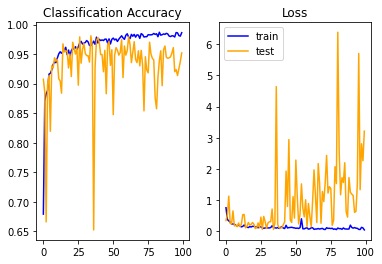

In [ ]:
def main():


  train_x=np.load('/content/drive/My Drive/DL/Face_mask_detection/dataset/face_mask_train_img_new.npz')['arr_0']
  train_y=np.load('/content/drive/My Drive/DL/Face_mask_detection/dataset/face_mask_train_lbl_new.npz')['arr_0']

  test_x=np.load('/content/drive/My Drive/DL/Face_mask_detection/dataset/face_mask_test_img_new.npz')['arr_0']
  test_y=np.load('/content/drive/My Drive/DL/Face_mask_detection/dataset/face_mask_test_lbl_new.npz')['arr_0']



  checkpoint=checkpoint = ModelCheckpoint(model_drive_save_path, monitor='val_accuracy', verbose=VERBOSE_ON, save_best_only=True, save_weights_only=False, mode='auto', period=1)

  model=generate_model(1,1)
  # train_data,test_data=generate_data(drive_train_data_path,0.2)
  # model,score,history=train_model(model,train_data,test_data,[checkpoint])

  (train_data,train_label),(test_data,test_label)=reshape_data(train_x,train_y,test_x,test_y)
  model,score,history=train_model_2(model,train_data,train_label,test_data,test_label,[checkpoint])

  plot_graphs(history)
  # plot_accuracy_and_loss_plots(history,plots_drive_save_path)

if __name__ == '__main__':
	main()